# Prepare Dataset

## Library

In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
tf.keras.utils.image_dataset_from_directory
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report

## Splitting

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Project Capstone

/content/drive/MyDrive/Project Capstone


In [4]:
# Set the path to the original folder containing 13 classes
original_folder_path = '/content/drive/MyDrive/Project Capstone/new_dataset'

# Set the path to the destination folder for train, test, and validation splits
destination_folder_path = "/content/drive/MyDrive/Project Capstone/Fadhil's Lab/dataset_baru/"


In [5]:
# Set the train, test, and validation split ratios (e.g., 70%, 20%, 10%)
train_ratio = 0.7
test_ratio = 0.2
val_ratio = 0.1

In [6]:
# Create the train, test, and validation folders
train_folder = os.path.join(destination_folder_path, 'train')
test_folder = os.path.join(destination_folder_path, 'test')
val_folder = os.path.join(destination_folder_path, 'val')

In [7]:
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)
# Iterate over the classes in the original folder
for class_name in os.listdir(original_folder_path):
    class_folder_path = os.path.join(original_folder_path, class_name)
    
    # Create class folders in train, test, and validation folders
    train_class_folder = os.path.join(train_folder, class_name)
    test_class_folder = os.path.join(test_folder, class_name)
    val_class_folder = os.path.join(val_folder, class_name)
    
    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(test_class_folder, exist_ok=True)
    os.makedirs(val_class_folder, exist_ok=True)
    
    # Get the list of images in the class folder
    images = os.listdir(class_folder_path)
    
    # Shuffle the images randomly
    random.shuffle(images)
    
    # Split the images into train, test, and validation sets
    train_count = int(len(images) * train_ratio)
    test_count = int(len(images) * test_ratio)
    val_count = len(images) - train_count - test_count
    
    train_images = images[:train_count]
    test_images = images[train_count:train_count + test_count]
    val_images = images[train_count + test_count:]
    
    # Move the images to the respective train, test, and validation class folders
    for image in train_images:
        src_path = os.path.join(class_folder_path, image)
        dst_path = os.path.join(train_class_folder, image)
        shutil.copy(src_path, dst_path)
    
    for image in test_images:
        src_path = os.path.join(class_folder_path, image)
        dst_path = os.path.join(test_class_folder, image)
        shutil.copy(src_path, dst_path)
    
    for image in val_images:
        src_path = os.path.join(class_folder_path, image)
        dst_path = os.path.join(val_class_folder, image)
        shutil.copy(src_path, dst_path)

In [8]:
train_path = "/content/drive/MyDrive/Project Capstone/Fadhil's Lab/dataset_baru/train"
test_path = "/content/drive/MyDrive/Project Capstone/Fadhil's Lab/dataset_baru/test"
val_path = "/content/drive/MyDrive/Project Capstone/Fadhil's Lab/dataset_baru/val"

## Preprocessing

In [9]:
train_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
train_path, target_size=(224, 224), batch_size=32)

test_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
test_path, target_size=(224, 224), batch_size=32)

val_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
val_path, target_size=(224, 224), batch_size=32)

Found 919 images belonging to 13 classes.
Found 266 images belonging to 13 classes.
Found 134 images belonging to 13 classes.


In [10]:
X_train, y_train = next(train_batches)
X_test, y_test = next(test_batches)
X_val, y_val = next(val_batches)

In [11]:
test_batches.image_shape

(224, 224, 3)

In [12]:
class_names= ['Academic', 'Baroque', 'Expressionism', 'Japanese', 'Neoclassicism', 'Nouveau', 'Primitivism', 'Realism', 'Renaissance', 'Rococo','Romanticism', 'Symbolism', 'Western Medieval']

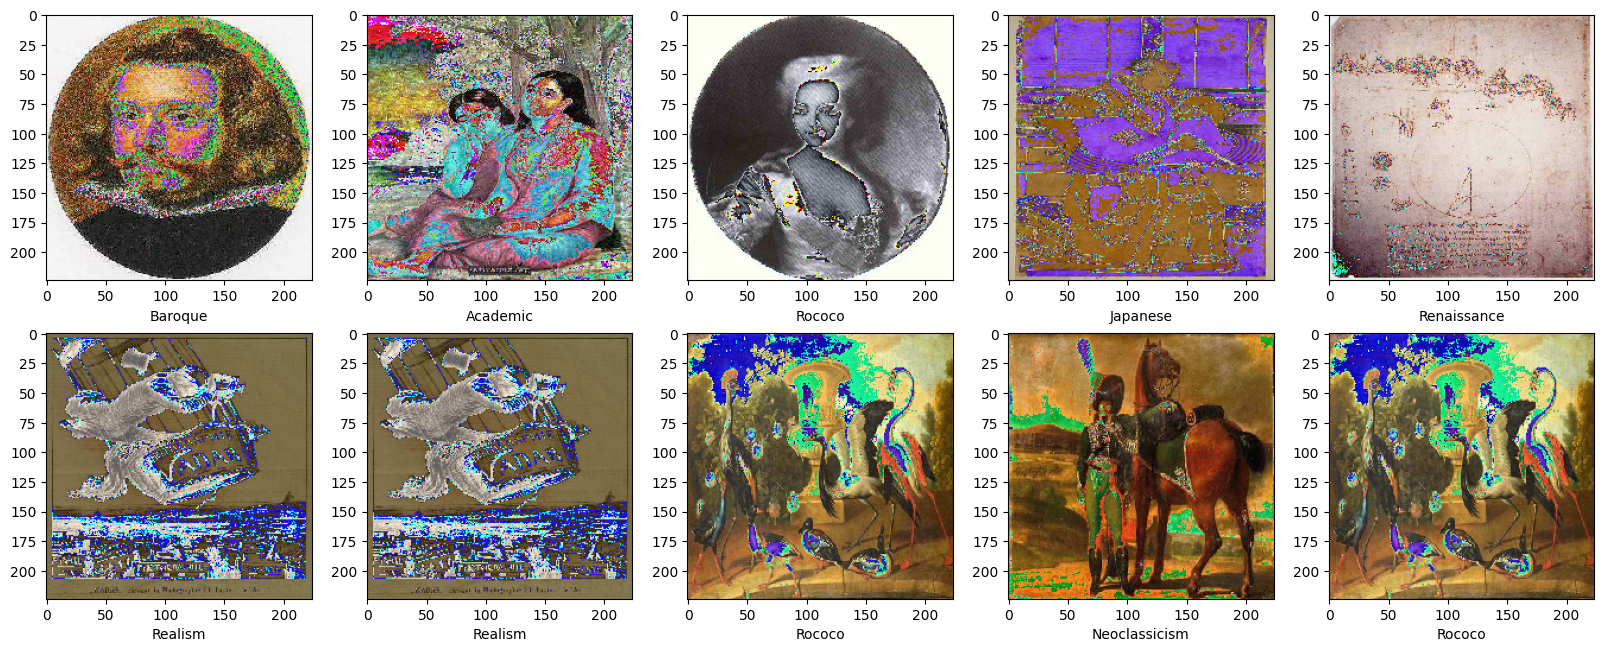

In [14]:
plt.figure(figsize=(20, 20))
for n, i in enumerate(np.random.randint(0, len(X_test), 10)):
    plt.subplot(5, 5, n+1)
    plt.imshow((X_test[i]*255).astype(np.uint8))
    plt.xlabel(class_names[np.argmax(y_test[i])])

In [15]:
plt.figure(figsize=(20, 20))
for n, i in enumerate(np.random.randint(0, len(X_train), 10)):
    plt.subplot(5, 5, n+1)
    plt.imshow((X_train[i]*255).astype(np.uint8))
    plt.xlabel(class_names[np.argmax(y_train[i])])

Output hidden; open in https://colab.research.google.com to view.

In [16]:
plt.figure(figsize=(20, 20))
for n, i in enumerate(np.random.randint(0, len(X_val), 10)):
    plt.subplot(5, 5, n+1)
    plt.imshow((X_val[i]*255).astype(np.uint8))
    plt.xlabel(class_names[np.argmax(y_val[i])])

Output hidden; open in https://colab.research.google.com to view.

In [17]:
img_train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

In [18]:
train_generator = img_train_datagen.flow(X_train, y_train, batch_size=32)
valid_generator = img_train_datagen.flow(X_val, y_val)

# MobileNet Model

In [20]:
mobile_net = tf.keras.applications.mobilenet.MobileNet(dropout=0.2)

In [21]:
model_mobile = tf.keras.Sequential()
for layer in mobile_net.layers[:-1]:
    model_mobile.add(layer)

In [22]:
for layer in model_mobile.layers:
    layer.trainable = False

In [23]:
model_mobile.add(tf.keras.layers.Dense(13, activation = 'Softmax'))

In [24]:
model_mobile.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                          
                                                                 
 conv_dw_1_relu (ReLU)       (None, 112, 112, 32)      0

In [25]:
model_mobile.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

In [27]:
history = model_mobile.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size = 32
                           , verbose=1, callbacks=[reduce_lr, early_stopping])

Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 8.0057 - accuracy: 0.0312 - val_loss: 5.9870 - val_accuracy: 0.0312 - lr: 0.0010
Epoch 2/5
1/1 [==============================] - 4s 4s/step - loss: 6.8314 - accuracy: 0.0938 - val_loss: 5.7196 - val_accuracy: 0.0938 - lr: 0.0010
Epoch 3/5
1/1 [==============================] - 5s 5s/step - loss: 5.5145 - accuracy: 0.0938 - val_loss: 5.5795 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 4/5
1/1 [==============================] - 4s 4s/step - loss: 3.6167 - accuracy: 0.2188 - val_loss: 5.5492 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 5/5
1/1 [==============================] - 3s 3s/step - loss: 3.6775 - accuracy: 0.2188 - val_loss: 5.5546 - val_accuracy: 0.1562 - lr: 0.0010


In [29]:
predictions = model_mobile.predict(X_test, verbose=1)

1/1 [==============================] - 1s 1s/step


In [30]:
acc = model_mobile.evaluate(X_test, y_test)
acc

1/1 [==============================] - 3s 3s/step - loss: 6.5690 - accuracy: 0.1250


[6.56904411315918, 0.125]

In [32]:
plt.figure(figsize=(20, 20))
for n, i in enumerate(np.random.randint(0, len(predictions), 20)):
    plt.subplot(5, 5, n+1)
    plt.imshow((X_test[i]*255).astype(np.uint8))
    plt.xlabel(class_names[np.argmax(y_test[i])])

Output hidden; open in https://colab.research.google.com to view.

In [34]:
conf = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))

<Axes: >

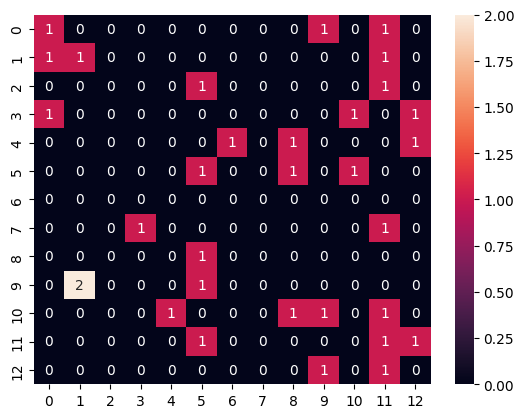

In [35]:
sns.heatmap(conf, annot= True, fmt='d')

In [36]:
clas = classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1))
print(clas)

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.33      0.33      0.33         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.20      0.33      0.25         3
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         4
          11       0.14      0.33      0.20         3
          12       0.00      0.00      0.00         2

    accuracy                           0.12        32
   macro avg       0.08      0.10      0.09        32
weighted avg       0.09      0.12      0.10        32



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

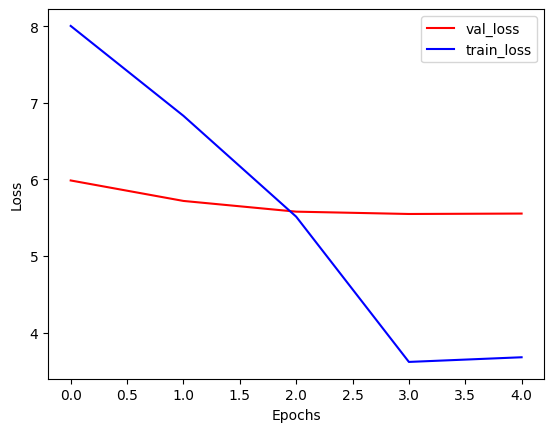

In [37]:
plt.plot(history.history['val_loss'], color='red', label='val_loss')
plt.plot(history.history['loss'], color='blue', label='train_loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()

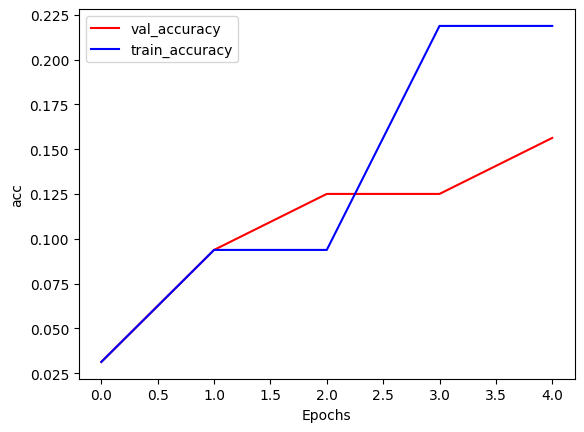

In [39]:
plt.plot(history.history['val_accuracy'], color='red', label='val_accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train_accuracy')
plt.xlabel('Epochs')
plt.ylabel("acc")
plt.legend()